In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Now we need to load the data - errors accessing locale, used online jupyter notebook, uploaded data to online folders
df = pd.read_csv("movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
#Any missing data?
print("num missing: \n")
for col in df.columns:
    #pct_missing = np.mean(df[col].isnull()) #gives percent of category that's null
    sum_missing = np.sum(df[col].isnull())
    print('{} = {}'.format(col, sum_missing))

num missing: 

name = 0
rating = 77
genre = 0
year = 0
released = 2
score = 3
votes = 3
director = 0
writer = 3
star = 1
country = 3
budget = 2171
gross = 189
company = 17
runtime = 4


In [7]:
#What data types are we dealing with?
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#changing data types of columns for further use - doesn't work before nulls are replaced
#df['budget'] = df['budget'].astype('int64' )
#df['gross'] = df['gross'].astype('int64', errors='ignore')

In [9]:
#sorting by gross
pd.set_option('display.max_rows', 7) #only displays 10 options. should make scrollable on some versions
df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [10]:
#Dropping Duplicates in display, not permanently such as with df = df.drop_duplicates()
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
                       ...                 
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

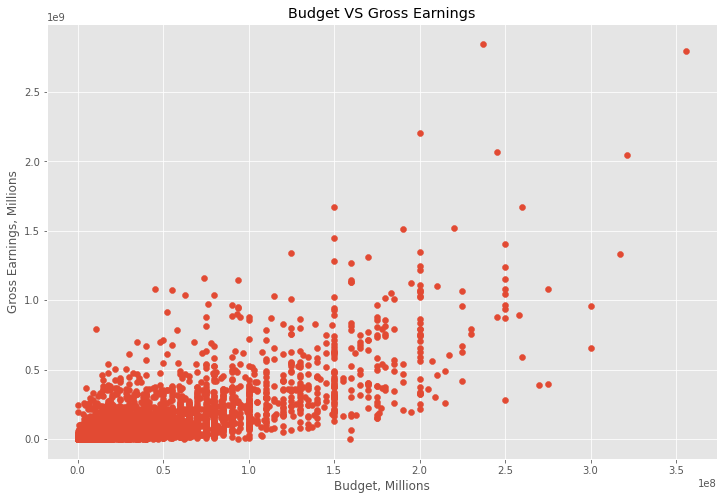

In [15]:
#scatter plot, budget vs gross revenue
#budgetVSGross_Scatter = *see below* #tested assignments, unnecessary
#budgetVSGross_Scatter.show()
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget, Millions')
plt.ylabel('Gross Earnings, Millions')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

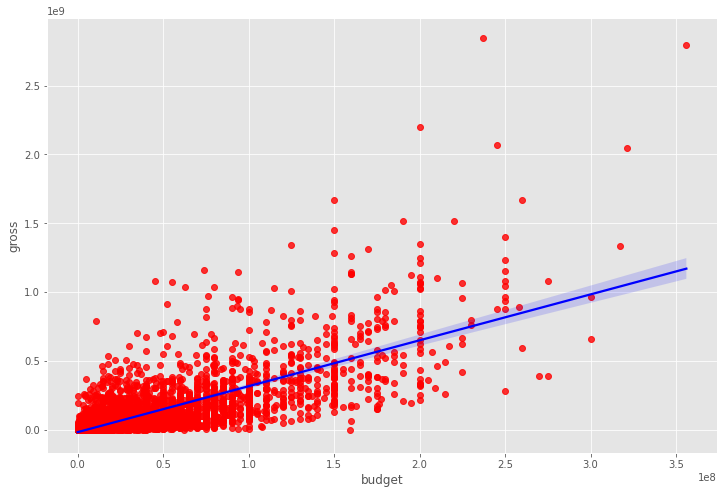

In [22]:
#plot budget vs gross using seaborn, regplot helps us visualize correlation
sns.regplot(x='budget',y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


In [26]:
#Correlation values, Pearson is default and will be used going forward
#pearson
df.corr(method="pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [27]:
#kendall
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.037749,0.329880,0.205717,0.204287,0.077972
score,0.037749,1.000000,0.290087,-0.017930,0.084564,0.257305
votes,0.329880,0.290087,1.000000,0.332833,0.547583,0.176884
budget,0.205717,-0.017930,0.332833,1.000000,0.508358,0.213223
gross,0.204287,0.084564,0.547583,0.508358,1.000000,0.148357
runtime,0.077972,0.257305,0.176884,0.213223,0.148357,1.000000


In [28]:
#spearman
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


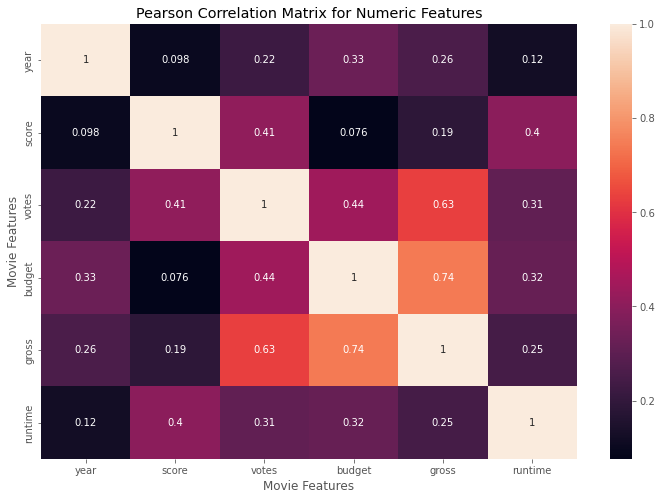

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Pearson Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
#A look at company
#change anything non-numeric to numeric values
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0
7667,5394,-1,10,2020,391,5.7,7.0,2165,3344,2463,44,NaN,NaN,1787,102.0


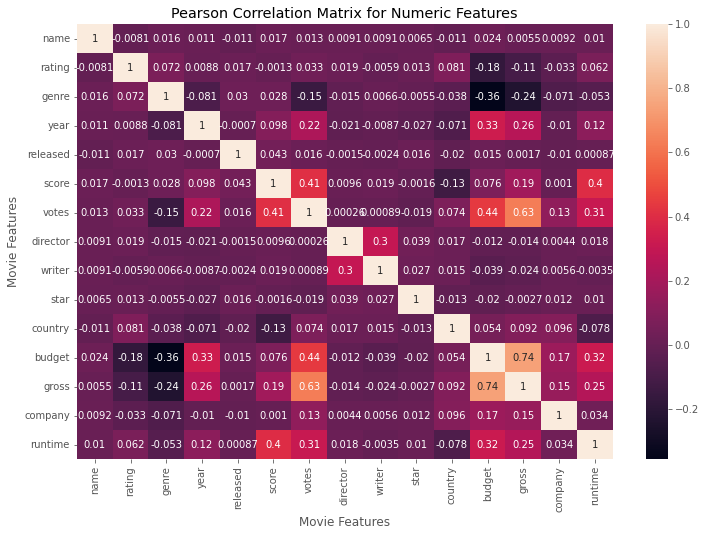

In [34]:
correlation_matrix2 = df_numerized.corr()
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Pearson Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
#by turning our object-columns into numeric values, we see a much larger correlation data set, giving us more insight

In [36]:
corr_matrix_num = df_numerized.corr()
corr_pairs = corr_matrix_num.unstack()
corr_pairs

name     name       1.000000
         rating    -0.008069
         genre      0.016355
                      ...   
runtime  gross      0.245216
         company    0.034402
         runtime    1.000000
Length: 225, dtype: float64

In [38]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
                      ...   
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [39]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross    votes      0.630757
votes    gross      0.630757
budget   gross      0.740395
                      ...   
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 19, dtype: float64